# Сокращение размерности

В каждом из заданий:
* Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков
* Попребирайте различное количество итоговых размерностей и постройте графики качества от количества размерностей. Выведите обе модели на одном графике в каждой заадче

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

# Forward selection (2pts)

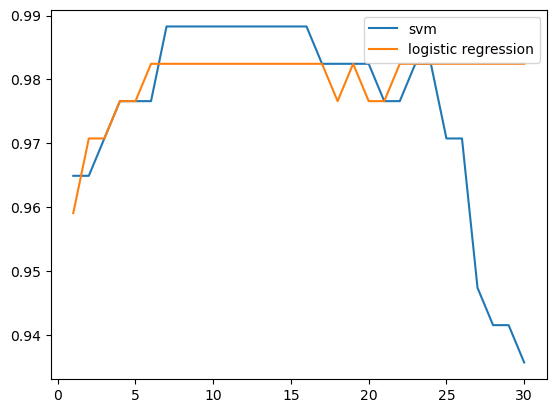

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

features = np.arange(X_train.shape[1])

x = []
y_svm = []
y_reg = []

features_svm = []
features_reg = []

def score_model (model, _features):
    features = np.array(sorted(_features))
    _X_train = X_train[:,features]
    _X_test = X_test[:,features]
    model.fit(_X_train, y_train)
    prediction = model.predict(_X_test)
    return accuracy_score(y_test, prediction)


for i in range(len(features)):
    best_feature_svm = -1
    score_svm = 0.0

    best_feature_reg = -1
    score_reg = 0.0

    for v in features:
        if v in features_svm:
            continue
        _features = features_svm.copy()
        _features.append(v)
        model = LinearSVC(random_state=123)
        score = score_model(model, _features)

        if best_feature_svm == -1 or score_svm < score:
            best_feature_svm = v
            score_svm = score

    model_svm = LinearSVC(random_state=123)
    features_svm.append(best_feature_svm)
    y_svm.append(score_model(model_svm, features_svm))

    for v in features:
        if v in features_reg:
            continue
        _features = features_reg.copy()
        _features.append(v)
        model = LogisticRegression(max_iter=(int)(5e2))
        score = score_model(model, _features)

        if best_feature_reg == -1 or score_reg < score:
            best_feature_reg = v
            score_reg = score

    model_reg = LogisticRegression(max_iter=(int)(5e2))
    features_reg.append(best_feature_reg)
    y_reg.append(score_model(model_reg, features_reg))

    x.append(i + 1)

    clear_output(True)
    plt.plot(x, y_svm, label="svm")
    plt.plot(x, y_reg, label="logistic regression")

    plt.legend()

    plt.show()

# Backward elimination (2pts)

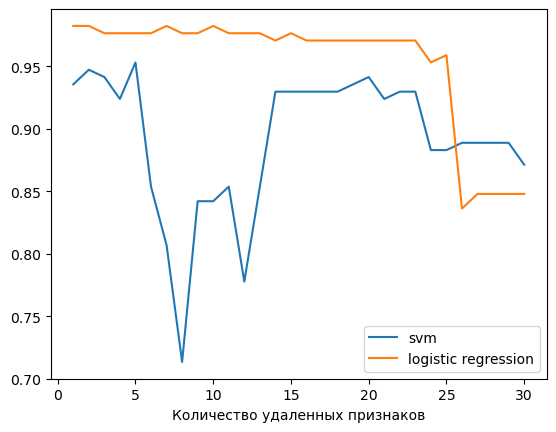

In [3]:
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

features = np.arange(X_train.shape[1])

x = []
y_svm = []
y_reg = []

features_svm = list(features)
features_reg = list(features)

def score_model (model, _features):
    features = np.array(sorted(_features))
    _X_train = X_train[:,features]
    _X_test = X_test[:,features]
    model.fit(_X_train, y_train)
    prediction = model.predict(_X_test)
    return accuracy_score(y_test, prediction)


for i in range(len(features)):
    model_svm = LinearSVC(random_state=123)
    y_svm.append(score_model(model_svm, features_svm))

    model_reg = LogisticRegression(max_iter=(int)(5e2))
    y_reg.append(score_model(model_reg, features_reg))

    x.append(i + 1)

    worst_feature_svm = -1
    score_svm = 0.0

    worst_feature_reg = -1
    score_reg = 0.0

    for v in features:
        if not v in features_svm:
            continue
        _features = features_svm.copy()
        _features.append(v)
        model = LinearSVC(random_state=123)
        score = score_model(model, _features)

        if worst_feature_svm == -1 or score_svm > score:
            worst_feature_svm = v
            score_svm = score

    for v in features:
        if not v in features_reg:
            continue
        _features = features_reg.copy()
        _features.append(v)
        model = LogisticRegression(max_iter=(int)(5e2))
        score = score_model(model, _features)

        if worst_feature_reg == -1 or score_reg > score:
            worst_feature_reg = v
            score_reg = score

    features_reg.remove(worst_feature_reg)
    features_svm.remove(worst_feature_svm)

    clear_output(True)
    plt.plot(x, y_svm, label="svm")
    plt.plot(x, y_reg, label="logistic regression")
    plt.xlabel("Количество удаленных признаков")

    plt.legend()

    plt.show()

# PCA (2 pts)


### EM алгоритм

Оставлю это тут просто чтобы пугать людей


$$
\log p(x|\theta) = \int q(z)\log p(x|\theta)dz = \int q(z)\log\dfrac{p(x,z|\theta)}{p(z|x,\theta)}dz = \int q(z)\log\dfrac{p(x,z|\theta)}{q(z)}dz+\int q(z)\log\dfrac{q(z)}{p(z|x,\theta)}dz = \mathcal{L}(q,\theta)+KL(q(z)|p(z|x,\theta))
$$

** E-step **
$$ q(z)^{(n+1)} = p(z|x,\theta^{(n)}) $$
** M-step **
$$ \theta^{(n+1)} = \max\limits_{\theta} \mathcal{L}(q^{(n+1)},\theta) $$

Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков. Попребирайте различное количество итоговых размерностей (до которых будет сокращать PCA) и постройте графики для обоих классификаторов. Сделайте выводы.

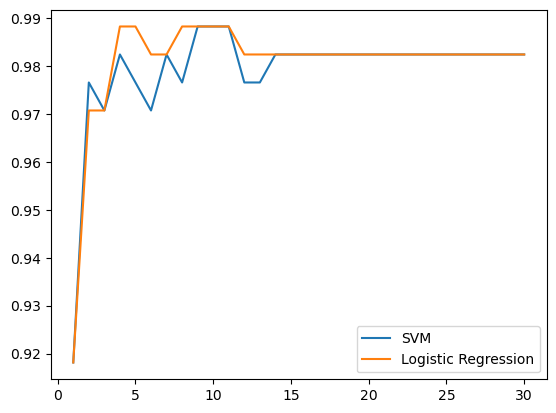

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x = []
y_svm = []
y_reg = []

for n_components in range(1, 31):
    pca = decomposition.PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=5)
    model_svm = SVC(kernel='linear', random_state=69)
    model_reg = LogisticRegression(max_iter=500, random_state=69)

    y_svm.append(accuracy_score(y_test, model_svm.fit(X_train, y_train).predict(X_test)))
    y_reg.append(accuracy_score(y_test, model_reg.fit(X_train, y_train).predict(X_test)))
    x.append(n_components)

plt.plot(x, y_svm, label="SVM")
plt.plot(x, y_reg, label="Logistic Regression")
plt.legend()
plt.show()


#  Выводы (1pts)

Для svm результат оказался лучше в pca и средне в forward selection, а для логистической регрессии - pca и forward selection. Для получения оптимального результата необходимо рассмотреть несколько путей решения задачи. Наилучший способ решения задачи зависит от ее данных.
